<h3>Forest Fire Model</h3>

Note that this model doesn’t have cyclic local dynamics; possible state transitions are
always one way from a tree (1) to a burning tree (2) to being charred (3), which is different
from the previous two examples. 

So the whole system eventually falls into a static final
configuration with no further changes possible. But the total area burned in the final
configuration greatly depends on the density of trees p. 

If you start with a sufficiently
large value of p, you will see that a significant portion of the forest will be burned down
eventually. 

This phenomenon is called percolation in statistical physics, which intuitively
means that something found a way to go through a large portion of material from one side
to the other.

Initial state:


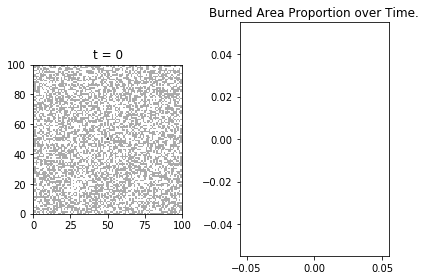

Next 5 states:


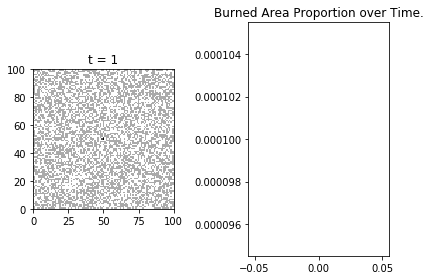

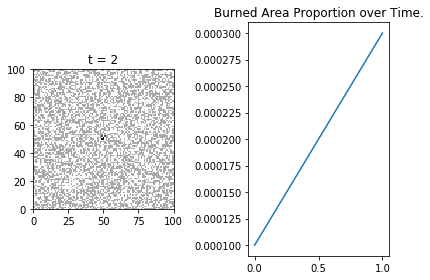

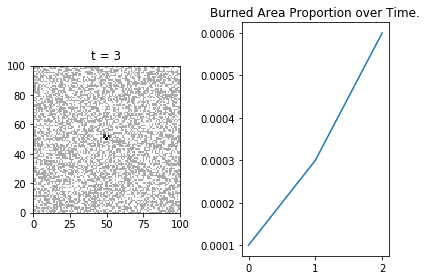

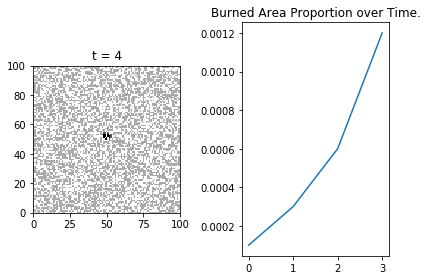

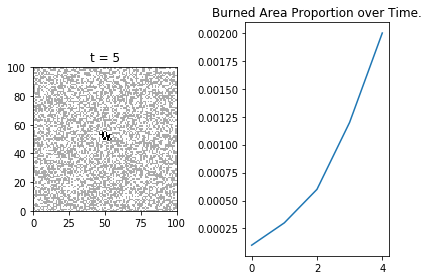


After 100 steps:
Fire stopped spreading at: t=77


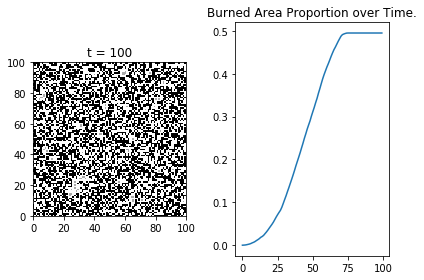

In [17]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

# Set this variable to True to run an interactive simulator. This will not work on CoCalc.
interactive = False  
#comment out 'matplotlib inline' if using the GUI
%matplotlib inline 

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP
import numpy as np

RD.seed()

#ForestFire Simulation Class

class ForestFire:
    
    def __init__(self,width=100,height=100,initProb=0.4,interactive=False):
        self.interactive = interactive
        self.width = width
        self.height = height
        self.initProb = initProb
        
        #set the states
        self.empty = 0
        self.tree = 1
        self.fire = 2
        self.char = 3
        
        #set timer and config
        self.time = 0
        self.config = SP.zeros([self.height, self.width])
        self.nextConfig = SP.zeros([self.height, self.width])
        
        #initialize total burned area
        self.total_burned_area = []
        
        
        
    def init(self):

        self.time = 0

        self.config = SP.zeros([self.height, self.width])
        for x in range(self.width):
            for y in range(self.height):
                if RD.random() < self.initProb:
                    state = self.tree
                else:
                    state = self.empty
                self.config[y, x] = state
        self.config[self.height//2, self.width//2] = self.fire

        self.nextConfig = SP.zeros([self.height, self.width])
  
        #initialize total burned area
        self.total_burned_area = []

    def draw(self):
        
        if self.interactive:
            PL.cla()  # Clear the current figure
        else:
            PL.figure()  # Create a new figure
       
        PL.subplot(1,2,1)
        PL.pcolor(self.config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
        PL.axis('image')
        PL.title('t = ' + str(self.time))
        
        PL.subplot(1,2,2)
        PL.plot(self.total_burned_area)
        PL.title(f'Burned Area Proportion over Time.')

        if not self.interactive:
            PL.tight_layout()
            PL.show()

    def step(self):

        self.time += 1

        for x in range(self.width):
            for y in range(self.height):
                state = self.config[y, x]
                if state == self.fire:
                    state = self.char
                elif state == self.tree:
                    for dx in range(-1, 2):
                        for dy in range(-1, 2):
                            if self.config[(y+dy)%self.height, (x+dx)%self.width] == self.fire:
                                state = self.fire
                self.nextConfig[y, x] = state

        self.config, self.nextConfig = self.nextConfig, self.config
        
        #append current density to total density
        curr_burned = np.count_nonzero(self.config == 3)/(self.height*self.width)
        
        #check when updating stops occuring, e.g. stable state is achieved:
        if len(self.total_burned_area)>1:
            if curr_burned == self.total_burned_area[-1] and curr_burned != self.total_burned_area[-2]:
                print(f"Fire stopped spreading at: t={self.time}")
            
        self.total_burned_area.append(curr_burned)
        
        
    def set_density(self, value=None):

        if value is not None:
            self.initProb = min(1, max(0, float(value)))
        return self.initProb

#initialize ForestFire simulator object
sim = ForestFire(initProb=0.5)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    pycxsimulator.GUI(parameterSetters=[sim.set_density]).start(func=[sim.init,sim.draw,sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.init()
    sim.draw()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.draw()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.draw()



<h3>Exercise 12.8</h3>

Why is it not correct to assume that the relationship between the
1×1 blocks and the 2×2 blocks can be applied to 2×2 and 4×4 (and larger)? Look at
Fig. 12.6 carefully and figure out some configurations that violate this assumption.

<img src="sayama-12.6.png"></img>

We can see from the configuration above that for the 4x4 blocks, there is an even higher number of combinations for the fire to spread through vs the 1x1 box, so the conductance relationship obtained from the 1x1 box to the 2x2 box transition will not be able to cover all the cases of the growth from the 2x2 box to the 4x4 box.

For example, in the 4x4 configuration, the diagonal spread does not have to have a 2x2 box in the upper-left corner and a 2x2 box in the lower right corner; a single diagonal line of 1x1 boxes would be enough for the fire to spread through.